In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from zero_churn_model.imports import * # basic imports
from zero_churn_model import helpers as hp

2024-10-09 09:05:12.421 | INFO     | zero_churn_model.config:<module>:11 - PROJ_ROOT path is: /home/zero/code-repos/protective-location


# Load Data

In [3]:
fp = hp.data_path('processed', 'X_train-lethal-whereas.parquet', validate=True)
X_train = pd.read_parquet(fp)
fp = hp.data_path('processed', 'X_test-lethal-whereas.parquet', validate=True)
X_test = pd.read_parquet(fp)

In [4]:
fp = hp.data_path('processed', 'y_train-lethal-whereas.parquet', validate=True)
y_train = pd.read_parquet(fp)['y']
fp = hp.data_path('processed', 'y_test-lethal-whereas.parquet', validate=True)
y_test = pd.read_parquet(fp)['y']

# Basic Logistic Regression Model

In [5]:
from sklearn.linear_model import LogisticRegression

We'll start by fitting a basic logistic regression model. 

First, we make the observation that there is a significant class imbalance in the data:

In [6]:
x = y_train.value_counts()
x / x.sum()

y
0    0.925731
1    0.074269
Name: count, dtype: float64

...only about 7% of the outcome variable is positive. 

So, in our logistic regression model we'll pass `class_weight='balanced'`, 

In [7]:
%%time
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)

CPU times: user 17min 8s, sys: 1.98 s, total: 17min 10s
Wall time: 1min 10s


LogisticRegression(class_weight='balanced', max_iter=1000)

              precision    recall  f1-score   support

           0       0.95      0.71      0.82     15316
           1       0.13      0.55      0.21      1184

    accuracy                           0.70     16500
   macro avg       0.54      0.63      0.51     16500
weighted avg       0.89      0.70      0.77     16500



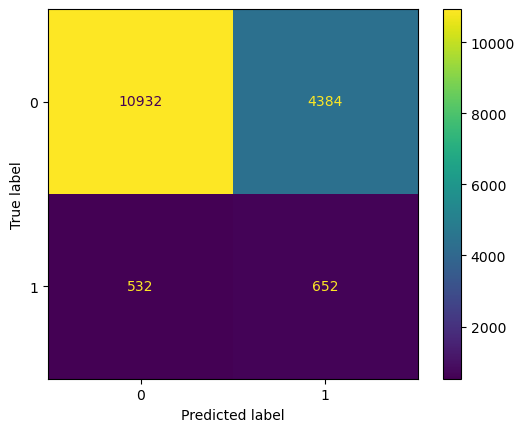

In [8]:
y_pred = model.predict(X_test)
d = hp.classification_report(y_pred, y_test)

print(d['report'])
d['plot'].plot();

...the logistic regression model does okay - we have a recall score of 0.55 and precision of 0.14. But this could be better, let's next try an ensemble method. 

# GradientBoostingClassifier 

In [14]:
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.ensemble import GradientBoostingClassifier

sample_weights = compute_sample_weight(y=y_train, class_weight='balanced')

In [15]:
%%time
model = GradientBoostingClassifier()
model.fit(X_train, y_train, sample_weight=sample_weights)

CPU times: user 16min 39s, sys: 111 ms, total: 16min 39s
Wall time: 16min 39s


GradientBoostingClassifier()

              precision    recall  f1-score   support

           0       0.95      0.75      0.84     15316
           1       0.14      0.52      0.22      1184

    accuracy                           0.73     16500
   macro avg       0.55      0.63      0.53     16500
weighted avg       0.89      0.73      0.79     16500



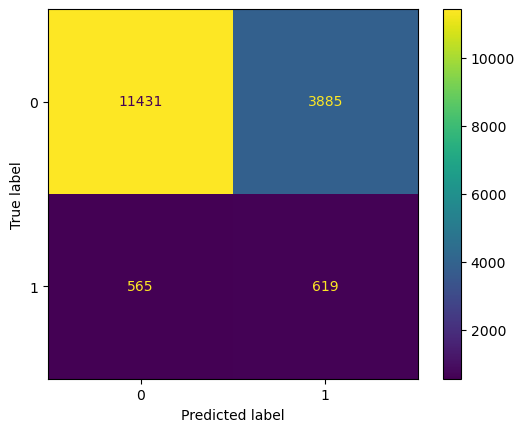

In [16]:
y_pred = model.predict(X_test)
d = hp.classification_report(y_pred, y_test)

print(d['report'])
d['plot'].plot();